## Monitoramento de Queimadas no Brasil entre os anos de 2003 a 2024

###  ADENILSON SILVA

## ANÁLISE DOS DADOS

###  1 - Importando bibliotecas e criando funções

In [1]:
import pandas as pd  # Manipulação de dados tabulares (DataFrame)
import seaborn as sns  # Visualização estatística de dados
import matplotlib.pyplot as plt  # Criação de gráficos

### 2 - Leitura dos dados

In [2]:
df = pd.read_parquet('dados_tratados.parquet')
df = df[df['ano'] != 2025]
df.head()

,ano,mes,data_hora,bioma,sigla_uf,sigla_uf_nome,id_municipio,id_municipio_nome,latitude,longitude,satelite,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo,estacao,classificacao_risco,mes_abrev
0,2024,7,2024-07-27 12:56:20,Cerrado,BA,Bahia,2909307,Correntina,-13.16580,-45.22000,GOES-16,107.0,0.0,1.0,125.8,Inverno,Crítico,Jul
1,2024,7,2024-07-27 15:26:20,Cerrado,BA,Bahia,2909307,Correntina,-13.16580,-45.22000,GOES-16,107.0,0.0,1.0,77.1,Inverno,Crítico,Jul
2,2024,7,2024-07-27 00:16:20,Cerrado,BA,Bahia,2909307,Correntina,-13.16580,-45.22000,GOES-16,107.0,0.0,1.0,206.2,Inverno,Crítico,Jul
3,2024,7,2024-07-27 00:56:20,Cerrado,BA,Bahia,2909307,Correntina,-13.18510,-45.21680,GOES-16,107.0,0.0,1.0,163.7,Inverno,Crítico,Jul
4,2024,7,2024-07-29 17:28:00,Cerrado,BA,Bahia,2917334,Iuiú,-14.43488,-43.43603,AQUA_M-T,107.0,0.0,1.0,350.8,Inverno,Crítico,Jul


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17464800 entries, 0 to 17542899
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   ano                      Int64         
 1   mes                      Int64         
 2   data_hora                datetime64[us]
 3   bioma                    object        
 4   sigla_uf                 object        
 5   sigla_uf_nome            object        
 6   id_municipio             object        
 7   id_municipio_nome        object        
 8   latitude                 float64       
 9   longitude                float64       
 10  satelite                 object        
 11  dias_sem_chuva           float64       
 12  precipitacao             float64       
 13  risco_fogo               float64       
 14  potencia_radiativa_fogo  float64       
 15  estacao                  object        
 16  classificacao_risco      object        
 17  mes_abrev                objec

In [4]:
df.describe()

,ano,mes,data_hora,latitude,longitude,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
count,17464800.0,17464800.0,17464800,1.746480e+07,1.746480e+07,1.253619e+07,1.253619e+07,1.253619e+07,1.234969e+07
mean,2020.332707,8.619323,2021-01-03 12:49:29.835112,-9.813342e+00,-5.249971e+01,2.912194e+01,6.655953e-01,7.749650e-01,3.914589e+01
min,2003.0,1.0,2003-01-01 16:04:00,-3.374046e+01,-7.386338e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2021.0,8.0,2021-09-14 17:07:00,-1.316600e+01,-5.740330e+01,4.000000e+00,0.000000e+00,6.100000e-01,3.800000e+00
50%,2023.0,9.0,2023-11-15 02:15:00,-9.111810e+00,-5.207881e+01,1.200000e+01,0.000000e+00,1.000000e+00,1.040000e+01
75%,2024.0,10.0,2024-09-01 05:15:58,-5.995700e+00,-4.674489e+01,4.100000e+01,0.000000e+00,1.000000e+00,5.860000e+01
max,2024.0,12.0,2024-12-31 23:50:00,5.217610e+00,-3.479613e+01,1.200000e+02,2.529800e+02,1.000000e+00,8.094300e+03
std,6.312935,2.06149,NaN,5.963302e+00,7.274830e+00,3.603397e+01,3.386806e+00,3.331619e-01,7.141325e+01


### 3 - Gráficos

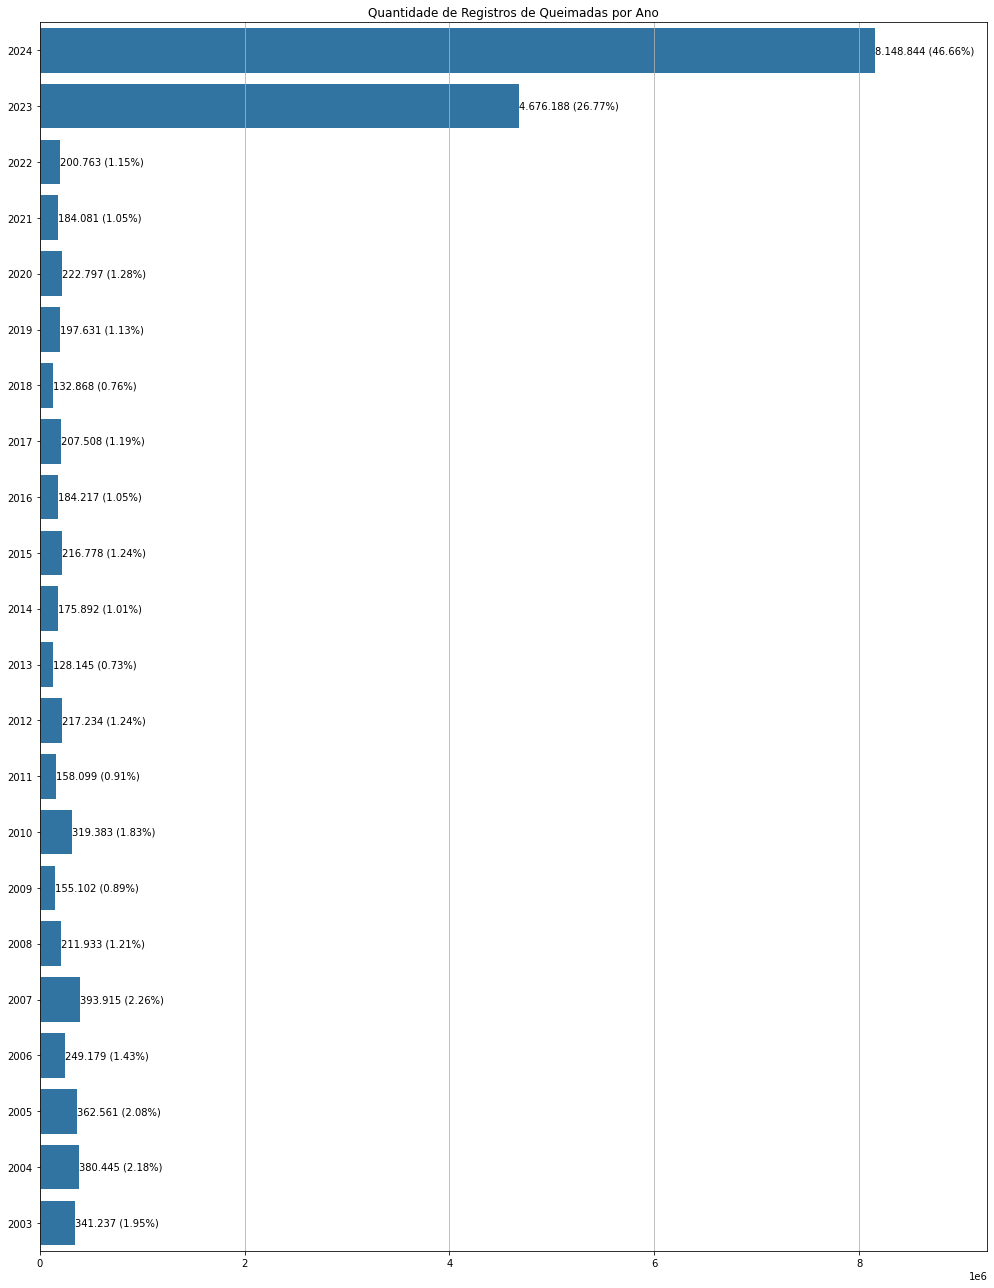

In [5]:
df_ano = df['ano'].value_counts().reset_index()
df_ano.columns = ['ano', 'quantidade']
df_ano['percentual'] = ((df_ano['quantidade'] / df_ano['quantidade'].sum()) * 100).round(2)
anos_ordenados = df_ano.sort_values('ano', ascending=False)['ano']

plt.figure(figsize=(14, 18))
ax = sns.barplot(data=df_ano, y='ano', x='quantidade', orient="y", order=anos_ordenados)
df_ano_sorted = df_ano.set_index('ano').loc[anos_ordenados].reset_index()
for i, (index, row) in enumerate(df_ano_sorted[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{valor:,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(valor, i, valor_e_percentual_formatado, ha='left', va='center', fontsize=10)
ax.grid(True, axis='x')
plt.title('Quantidade de Registros de Queimadas por Ano')
plt.ylabel(None)
plt.xlabel(None)
plt.xlim(right=df_ano.quantidade.max()+1100000)
plt.tight_layout()
plt.show()

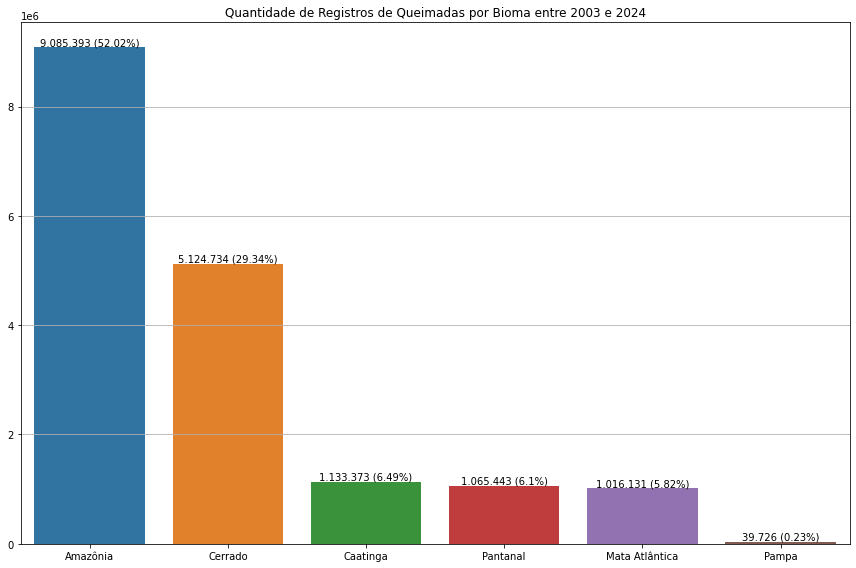

In [6]:
df_bioma = df['bioma'].value_counts().reset_index()
df_bioma.columns = ['bioma', 'quantidade']
df_bioma['percentual'] = ((df_bioma['quantidade'] / df_bioma['quantidade'].sum()) * 100).round(2)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_bioma, x='bioma', y='quantidade', hue="bioma", legend=False)
for i, (index, row) in enumerate(df_bioma[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(df_bioma['bioma'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Quantidade de Registros de Queimadas por Bioma entre 2003 e 2024')
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
plt.show()

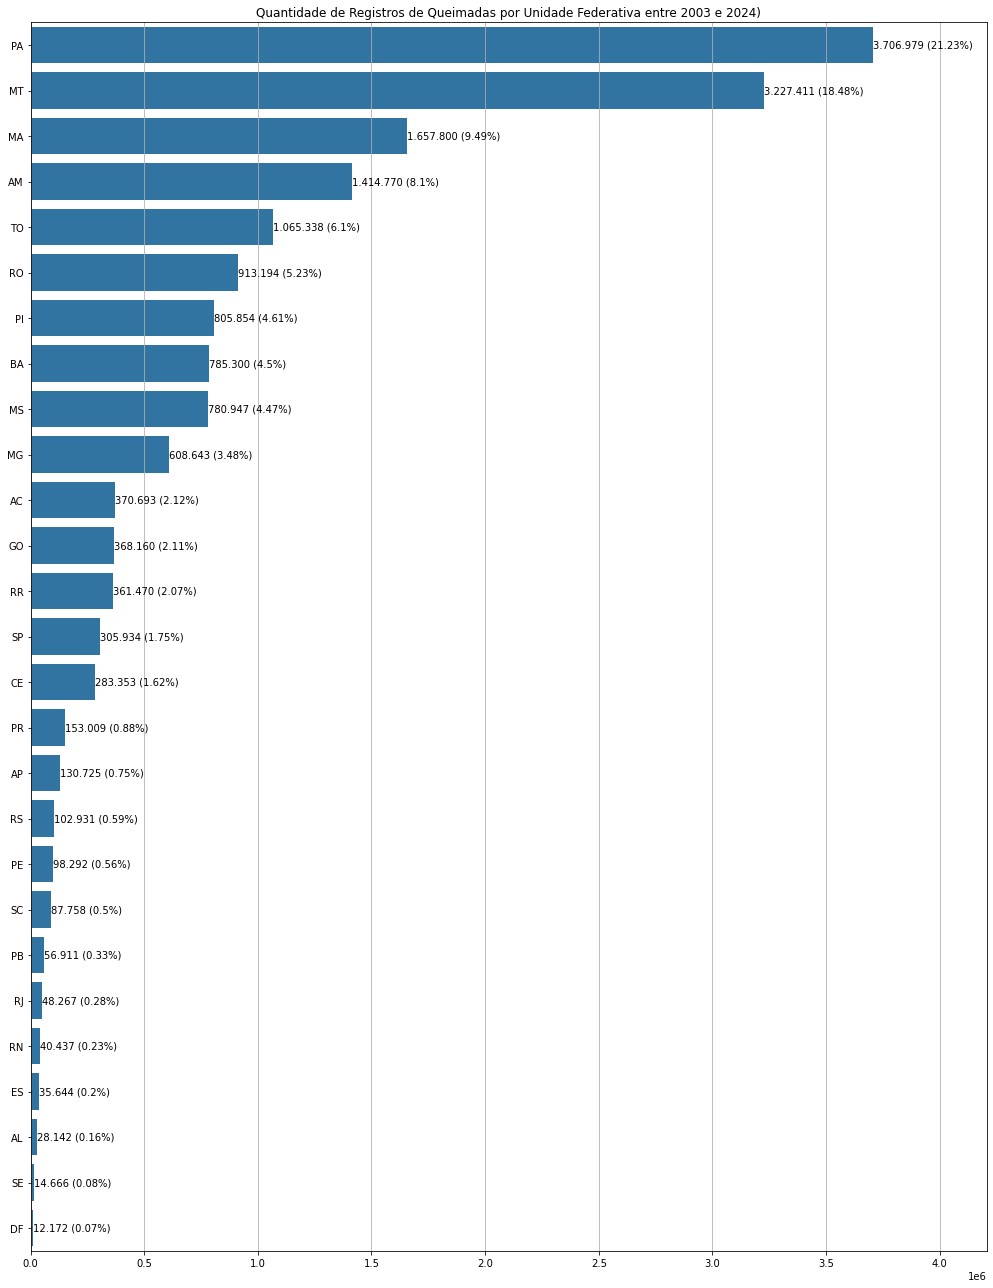

In [7]:
df_uf = df['sigla_uf'].value_counts().reset_index()
df_uf.columns = ['sigla_uf', 'quantidade']
df_uf['percentual'] = ((df_uf['quantidade'] / df_uf['quantidade'].sum()) * 100).round(2)

plt.figure(figsize=(14, 18))
ax = sns.barplot(data=df_uf, y='sigla_uf', x='quantidade', orient="y")
for i, (index, row) in enumerate(df_uf[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(valor, i, valor_e_percentual_formatado, ha='left', va='center', fontsize=10)
ax.grid(True, axis='x')
plt.title('Quantidade de Registros de Queimadas por Unidade Federativa entre 2003 e 2024)')
plt.ylabel(None)
plt.xlabel(None)
plt.xlim(right=df_uf.quantidade.max()+500000)
plt.tight_layout()
plt.show()

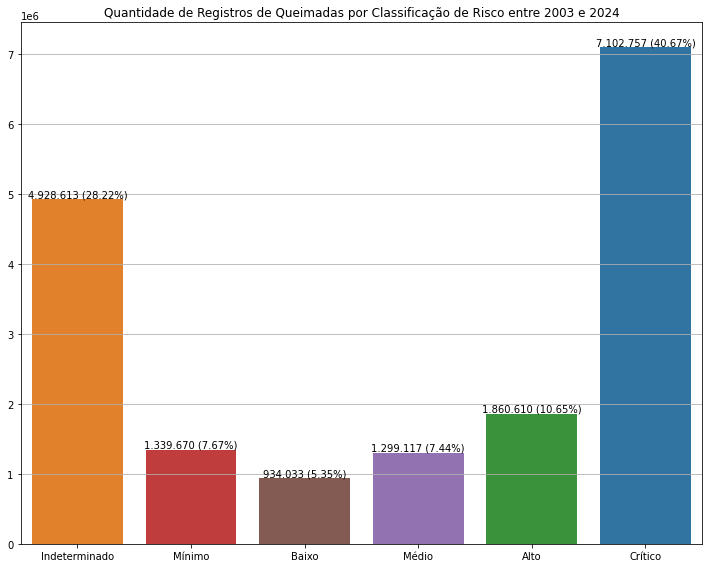

In [8]:
df_risco = df['classificacao_risco'].value_counts().reset_index()
df_risco.columns = ['classificacao_risco', 'quantidade']
df_risco['percentual'] = ((df_risco['quantidade'] / df_risco['quantidade'].sum()) * 100).round(2)
ordem = ['Indeterminado','Mínimo','Baixo','Médio', 'Alto', 'Crítico']

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_risco, x='classificacao_risco', y='quantidade', hue="classificacao_risco", legend=False, order=ordem)
df_risco_sorted = df_risco.set_index('classificacao_risco').loc[ordem].reset_index()
for i, (index, row) in enumerate(df_risco_sorted[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(df_risco_sorted['classificacao_risco'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Quantidade de Registros de Queimadas por Classificação de Risco entre 2003 e 2024')
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
plt.show()

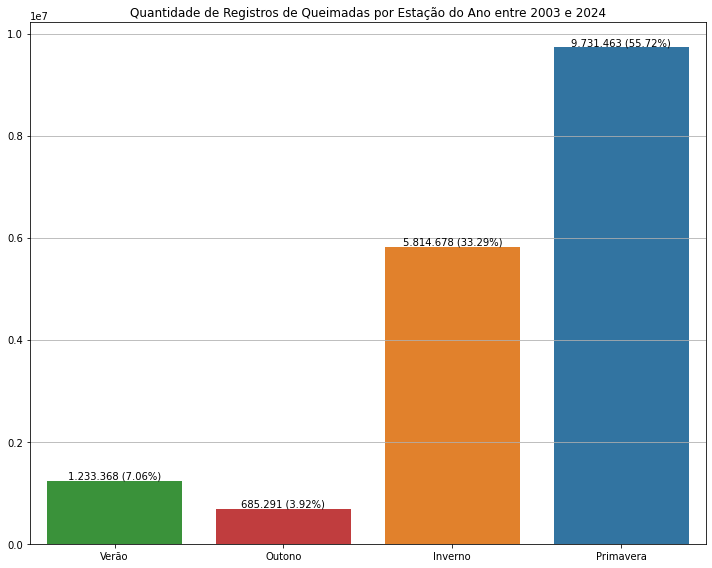

In [9]:
df_estacao = df['estacao'].value_counts().reset_index()
df_estacao.columns = ['estacao', 'quantidade']
df_estacao['percentual'] = ((df_estacao['quantidade'] / df_estacao['quantidade'].sum()) * 100).round(2)
ordem = ['Verão','Outono','Inverno','Primavera']

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_estacao, x='estacao', y='quantidade', hue="estacao", legend=False, order=ordem)
df_estacao_sorted = df_estacao.set_index('estacao').loc[ordem].reset_index()
for i, (index, row) in enumerate(df_estacao_sorted[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(df_estacao_sorted['estacao'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Quantidade de Registros de Queimadas por Estação do Ano entre 2003 e 2024')
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
plt.show()

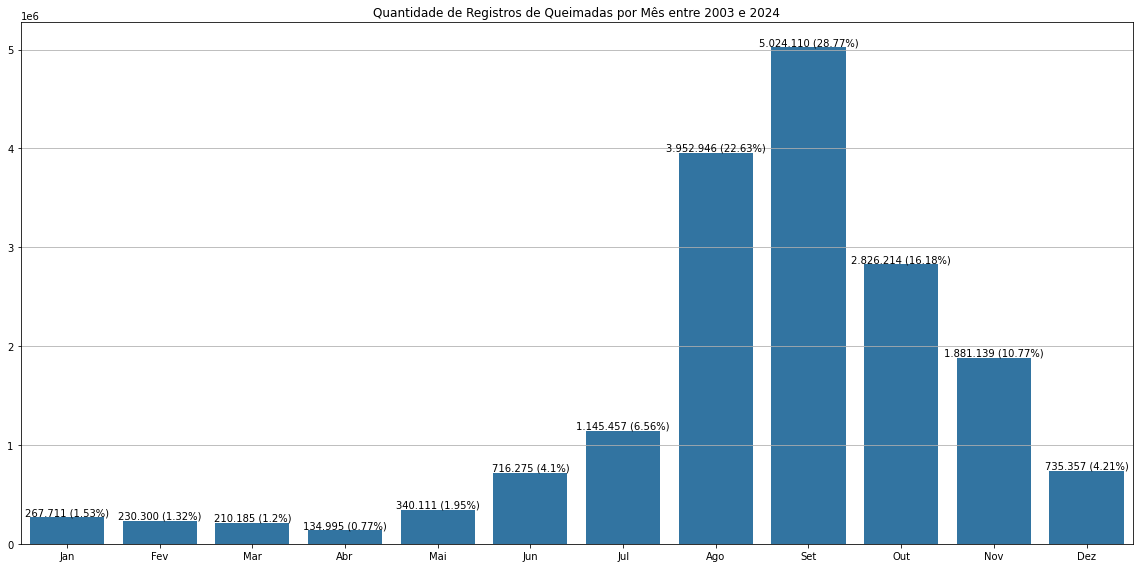

In [10]:
df_mes = df[['mes_abrev', 'mes']].value_counts().reset_index()
df_mes.columns = ['mes_abrev', 'mes','quantidade']
df_mes['percentual'] = ((df_mes['quantidade'] / df_mes['quantidade'].sum()) * 100).round(2)
mes_ordenados = df_mes.sort_values('mes')['mes_abrev']

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_mes, x='mes_abrev', y='quantidade',order=mes_ordenados)
df_mes_sorted = df_mes.set_index('mes_abrev').loc[mes_ordenados].reset_index()
for i, (index, row) in enumerate(df_mes_sorted[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(df_mes_sorted['mes_abrev'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Quantidade de Registros de Queimadas por Mês entre 2003 e 2024')
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
plt.show()

### 4 - Ranking 

In [11]:
df_municipios_ranking_geral = df[['id_municipio_nome','sigla_uf_nome']].value_counts().reset_index()
df_municipios_ranking_geral.columns = ['Município', 'Unidade Federativa', 'Quantidade de Queimadas']
print('Os 10 Municípios com maior quantidade de queimadas entre 2003 e 2024 - (Classificação Geral) \n')
print(df_municipios_ranking_geral.sort_values('Quantidade de Queimadas', ascending=False).head(10))

Os 10 Municípios com maior quantidade de queimadas entre 2003 e 2024 - (Classificação Geral) 

            Município  Unidade Federativa  Quantidade de Queimadas
0  São Félix do Xingu                Pará                   436413
1            Altamira                Pará                   407329
2             Corumbá  Mato Grosso do Sul                   375958
3                Apuí            Amazonas                   270693
4              Lábrea            Amazonas                   264970
5      Novo Progresso                Pará                   243129
6         Porto Velho            Rondônia                   242481
7             Cáceres         Mato Grosso                   198880
8              Poconé         Mato Grosso                   184456
9             Colniza         Mato Grosso                   165096


In [12]:
df_critico = df[df['classificacao_risco'] == 'Crítico']
df_municipios_ranking_critico = df_critico[['id_municipio_nome','sigla_uf_nome']].value_counts().reset_index()
df_municipios_ranking_critico.columns = ['Município', 'Unidade Federativa', 'Quantidade de Queimadas']
print('Os 10 Municípios com maior quantidade de queimadas críticas entre 2003 e 2024 - (Classificação Crítica) \n')
print(df_municipios_ranking_critico.sort_values('Quantidade de Queimadas', ascending=False).head(10))

Os 10 Municípios com maior quantidade de queimadas críticas entre 2003 e 2024 - (Classificação Crítica) 

             Município  Unidade Federativa  Quantidade de Queimadas
0   São Félix do Xingu                Pará                   247331
1             Altamira                Pará                   201626
2              Corumbá  Mato Grosso do Sul                   138775
3       Novo Progresso                Pará                   134712
4              Cáceres         Mato Grosso                   101612
5    Lagoa da Confusão           Tocantins                    92648
6               Lábrea            Amazonas                    85861
7     Barão de Melgaço         Mato Grosso                    77275
8  Ourilândia do Norte                Pará                    59661
9          Porto Velho            Rondônia                    56519


### Dados sobre versão

In [13]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", matplotlib.__version__)

Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
pandas: 2.2.3
numpy: 1.23.5
seaborn: 0.13.2
matplotlib: 3.9.4
